# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import wrangle

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

# Prepare and Acquire

In [2]:
df = pd.read_csv("clean_zillow.csv")

In [3]:
df.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  10711855      261.0                   1        2.0       3.0      8.0   
1  10711877      261.0                   1        2.0       4.0      8.0   
2  10711888      261.0                   1        2.0       4.0      8.0   
3  10711910      261.0                   1        2.0       3.0      8.0   
4  10711923      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  in_los_angeles  \
0       2107.0  6037.0            0.0             2.0  ...               1   
1       1882.0  6037.0            0.0             2.0  ...               1   
2       1882.0  6037.0            0.0             2.0  ...               1   
3       1477.0  6037.0            0.0             2.0  ...               1   
4       1918.0  6037.0            0.0             2.0  ...               1   

   in_orange_county  in_ventura  house_age   tax_rate     acres  \
0                 0           0       49.0  81.487096  0.210239   
1                 0           0       49.0  81.241668  0.207415   
2                 0           0       49.0  81.358231  0.224977   
3                 0           0       61.0  69.891443  0.259068   
4                 0           0       61.0  79.288338  0.258012   

   level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  
0            Accurate           2k-2.5k          0-10k       0-15  
1            Accurate           1.5l-2k          0-10k       0-15  
2            Accurate           1.5l-2k          0-10k       0-15  
3            Accurate           1k-1.5k        10k-20k       0-15  
4            Accurate           1.5l-2k        10k-20k       0-15  

[5 rows x 34 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59731 entries, 0 to 59730
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             59731 non-null  int64  
 1   land_type            59731 non-null  float64
 2   has_heating_system   59731 non-null  int64  
 3   bathrooms            59731 non-null  float64
 4   bedrooms             59731 non-null  float64
 5   quality              59731 non-null  float64
 6   square_feet          59731 non-null  float64
 7   fips                 59731 non-null  float64
 8   has_fireplace        59731 non-null  float64
 9   full_bathrooms       59731 non-null  float64
 10  latitude             59731 non-null  float64
 11  longitude            59731 non-null  float64
 12  lot_square_feet      59731 non-null  float64
 13  has_pool             59731 non-null  float64
 14  city                 59731 non-null  float64
 15  county               59731 non-null 

In [5]:
train, validate, test = wrangle.split_zillow(df)

In [6]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
28964  12397645      261.0                   1        2.0       3.0      6.0   
42720  13899643      261.0                   0        1.0       2.0      6.0   
5104   10936804      261.0                   1        1.0       2.0      4.0   
37768  12877473      261.0                   1        3.0       5.0      6.0   
10735  11190920      261.0                   1        2.0       4.0      8.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
28964       1139.0  6037.0            0.0             2.0  ...   
42720        882.0  6059.0            0.0             1.0  ...   
5104         943.0  6037.0            0.0             1.0  ...   
37768       1449.0  6037.0            0.0             3.0  ...   
10735       1546.0  6037.0            0.0             2.0  ...   

       in_los_angeles  in_orange_county  in_ventura  house_age   tax_rate  \
28964               1                 0           0       70.0  77.088243   
42720               0                 1           0       65.0  99.593289   
5104                1                 0           0       81.0  91.300853   
37768               1                 0           0       51.0  77.842486   
10735               1                 0           0       29.0  51.992135   

          acres  level_of_log_error  square_feet_bins  lot_sqft_bins  \
28964  0.115886            Accurate           1k-1.5k          0-10k   
42720  0.094582            Accurate            500-1k          0-10k   
5104   0.163522            Accurate            500-1k          0-10k   
37768  0.141919                Over           1k-1.5k          0-10k   
10735  0.195294            Accurate           1.5l-2k          0-10k   

       acre_bins  
28964       0-15  
42720       0-15  
5104        0-15  
37768       0-15  
10735       0-15  

[5 rows x 34 columns]

In [7]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [8]:
X_train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
28964  12397645      261.0                   1        2.0       3.0      6.0   
42720  13899643      261.0                   0        1.0       2.0      6.0   
5104   10936804      261.0                   1        1.0       2.0      4.0   
37768  12877473      261.0                   1        3.0       5.0      6.0   
10735  11190920      261.0                   1        2.0       4.0      8.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
28964       1139.0  6037.0            0.0             2.0  ...   
42720        882.0  6059.0            0.0             1.0  ...   
5104         943.0  6037.0            0.0             1.0  ...   
37768       1449.0  6037.0            0.0             3.0  ...   
10735       1546.0  6037.0            0.0             2.0  ...   

       in_los_angeles  in_orange_county  in_ventura  house_age   tax_rate  \
28964               1                 0           0       70.0  77.088243   
42720               0                 1           0       65.0  99.593289   
5104                1                 0           0       81.0  91.300853   
37768               1                 0           0       51.0  77.842486   
10735               1                 0           0       29.0  51.992135   

          acres  level_of_log_error  square_feet_bins  lot_sqft_bins  \
28964  0.115886            Accurate           1k-1.5k          0-10k   
42720  0.094582            Accurate            500-1k          0-10k   
5104   0.163522            Accurate            500-1k          0-10k   
37768  0.141919                Over           1k-1.5k          0-10k   
10735  0.195294            Accurate           1.5l-2k          0-10k   

       acre_bins  
28964       0-15  
42720       0-15  
5104        0-15  
37768       0-15  
10735       0-15  

[5 rows x 33 columns]

In [9]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [10]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
28964  12397645      261.0                   1        2.0       3.0      6.0   
42720  13899643      261.0                   0        1.0       2.0      6.0   
5104   10936804      261.0                   1        1.0       2.0      4.0   
37768  12877473      261.0                   1        3.0       5.0      6.0   
10735  11190920      261.0                   1        2.0       4.0      8.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
28964       1139.0  6037.0            0.0             2.0  ...   
42720        882.0  6059.0            0.0             1.0  ...   
5104         943.0  6037.0            0.0             1.0  ...   
37768       1449.0  6037.0            0.0             3.0  ...   
10735       1546.0  6037.0            0.0             2.0  ...   

       in_los_angeles  in_orange_county  in_ventura  house_age   tax_rate  \
28964               1                 0           0       70.0  77.088243   
42720               0                 1           0       65.0  99.593289   
5104                1                 0           0       81.0  91.300853   
37768               1                 0           0       51.0  77.842486   
10735               1                 0           0       29.0  51.992135   

          acres  level_of_log_error  square_feet_bins  lot_sqft_bins  \
28964  0.115886            Accurate           1k-1.5k          0-10k   
42720  0.094582            Accurate            500-1k          0-10k   
5104   0.163522            Accurate            500-1k          0-10k   
37768  0.141919                Over           1k-1.5k          0-10k   
10735  0.195294            Accurate           1.5l-2k          0-10k   

       acre_bins  
28964       0-15  
42720       0-15  
5104        0-15  
37768       0-15  
10735       0-15  

[5 rows x 34 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59731 entries, 0 to 59730
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             59731 non-null  int64  
 1   land_type            59731 non-null  float64
 2   has_heating_system   59731 non-null  int64  
 3   bathrooms            59731 non-null  float64
 4   bedrooms             59731 non-null  float64
 5   quality              59731 non-null  float64
 6   square_feet          59731 non-null  float64
 7   fips                 59731 non-null  float64
 8   has_fireplace        59731 non-null  float64
 9   full_bathrooms       59731 non-null  float64
 10  latitude             59731 non-null  float64
 11  longitude            59731 non-null  float64
 12  lot_square_feet      59731 non-null  float64
 13  has_pool             59731 non-null  float64
 14  city                 59731 non-null  float64
 15  county               59731 non-null 

# Exploration

## Take a look at correlations to log error.

I deccided to skip the correlation heat map for right now because it looked like a mess with houw many features it was taking in.
- I would love to learn a way to make a correlation heat map where you specify which column will be on x and y 

In [12]:
df[df.columns[1:]].corr()['logerror'][:]

land_type             -0.008705
has_heating_system    -0.021336
bathrooms              0.020770
bedrooms               0.027048
quality               -0.014792
square_feet            0.027979
fips                   0.006140
has_fireplace         -0.003338
full_bathrooms         0.019740
latitude              -0.017040
longitude              0.020055
lot_square_feet        0.011710
has_pool              -0.003338
city                   0.002682
county                -0.020803
zip_code               0.001357
room_count             0.013149
unitcnt                     NaN
structure_tax_value   -0.005743
tax_value             -0.015970
land_tax_value        -0.018069
taxamount             -0.017015
logerror               1.000000
in_los_angeles        -0.018023
in_orange_county       0.022474
in_ventura            -0.003744
house_age             -0.005595
tax_rate              -0.007258
acres                  0.011710
Name: logerror, dtype: float64

## I want to look at some visualizations and see what I see

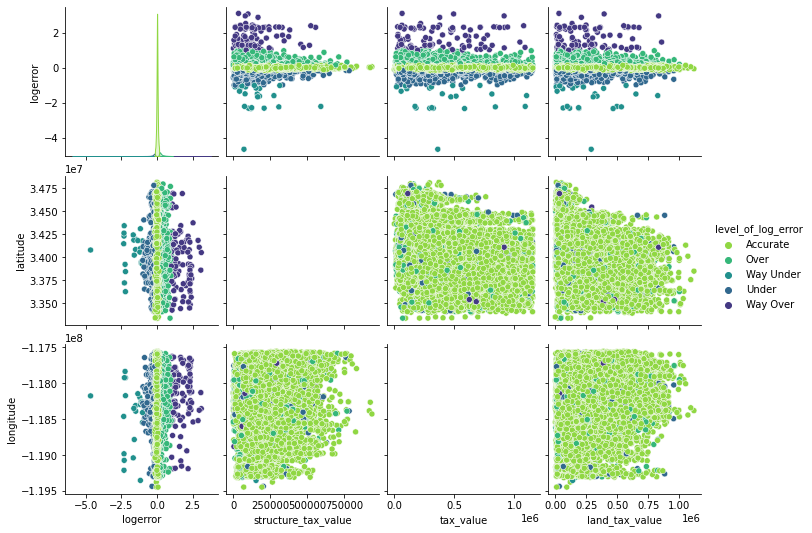

In [13]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'structure_tax_value', 'tax_value', 
                       'land_tax_value'],
             y_vars = ['logerror', 'latitude', 'longitude'], 
             palette='viridis_r')

### Takeaways:
- 

___

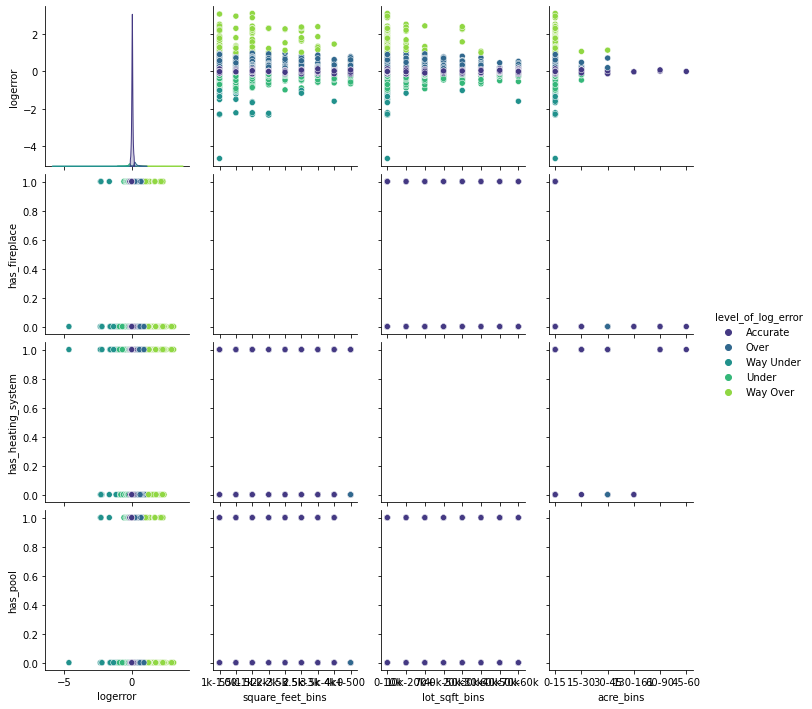

In [14]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 
                       'acre_bins'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 
                       'has_pool'], palette='viridis')

### Takeaways:
- 

___

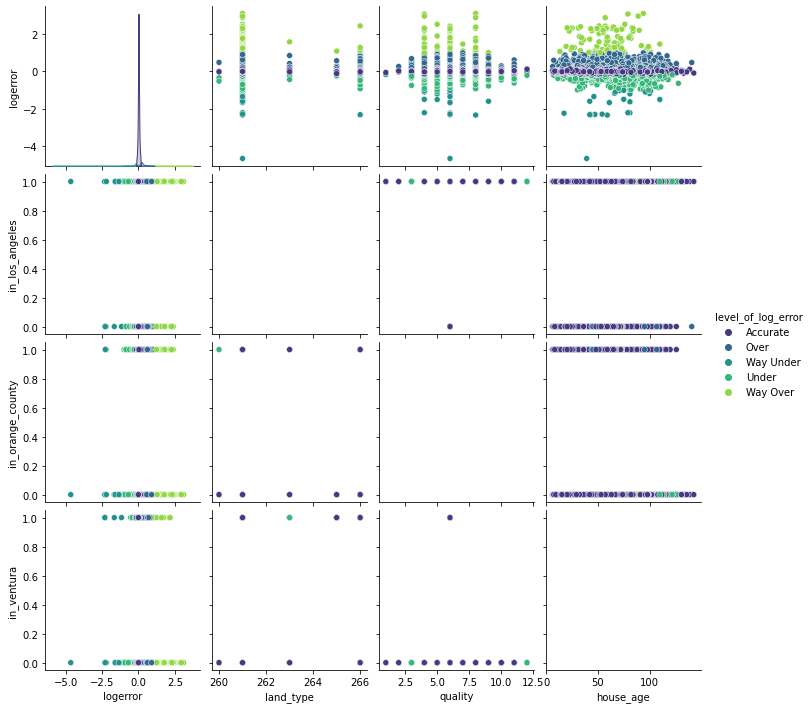

In [15]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'land_type', 'quality', 
                       'house_age'],
             y_vars = ['logerror', 'in_los_angeles', 
                       'in_orange_county', 'in_ventura'], palette='viridis')

### Takeaways:
- 

___

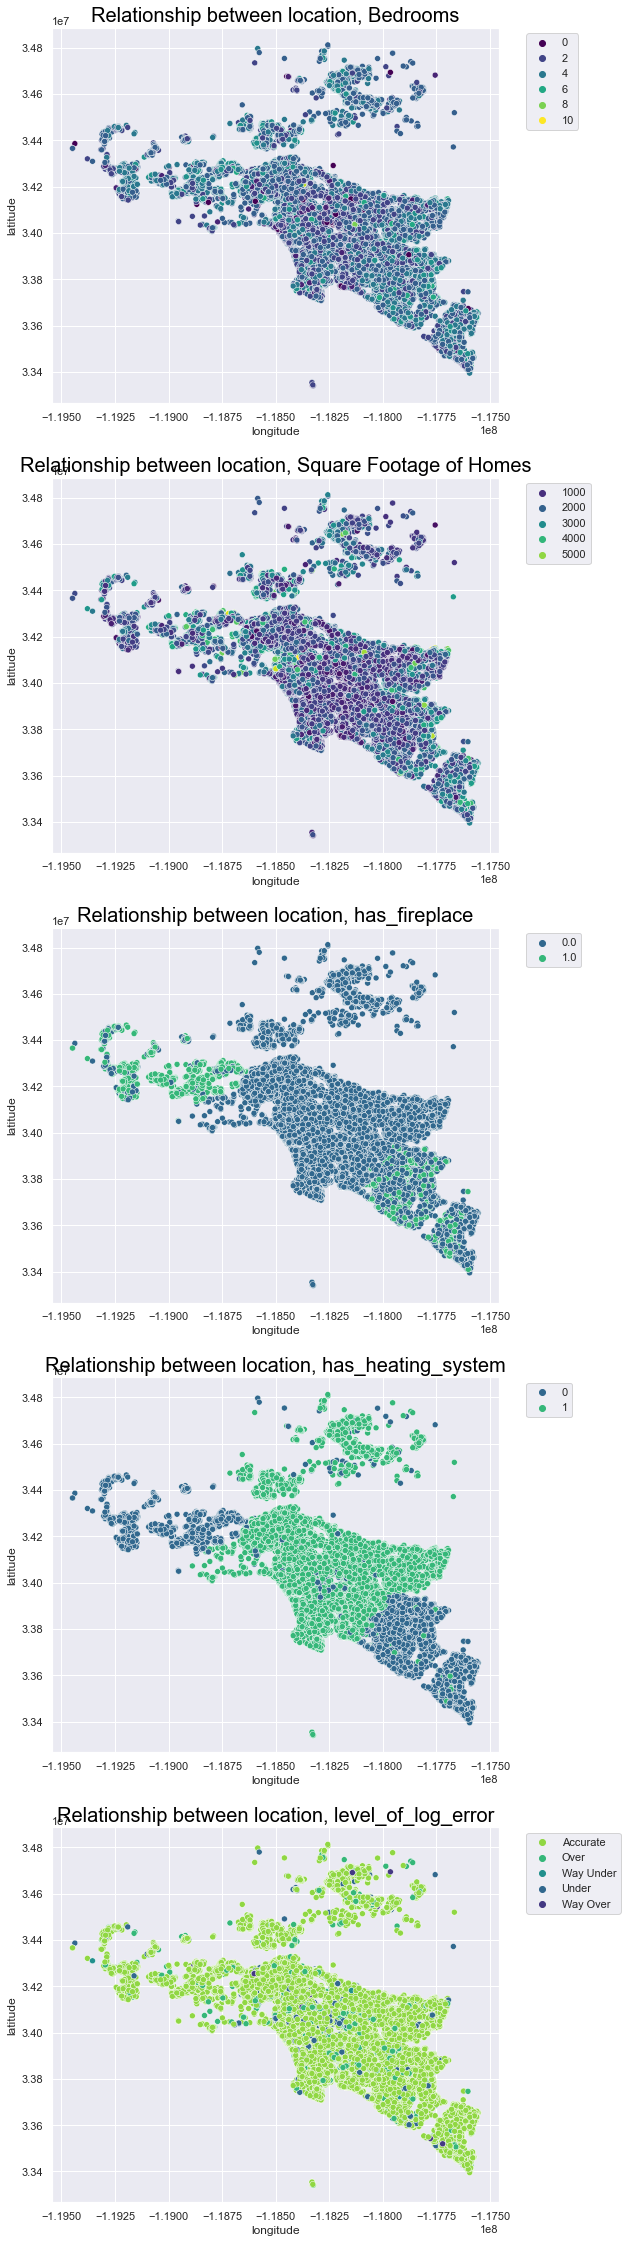

In [16]:
plt.subplots(5, 1, figsize=(8,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.bedrooms, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='square_feet', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_fireplace, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_heating_system, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='level_of_log_error', palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Takeaways:
- 

___

<AxesSubplot:title={'center':'Relationship between location, level_of_log_error'}, xlabel='level_of_log_error', ylabel='latitude'>

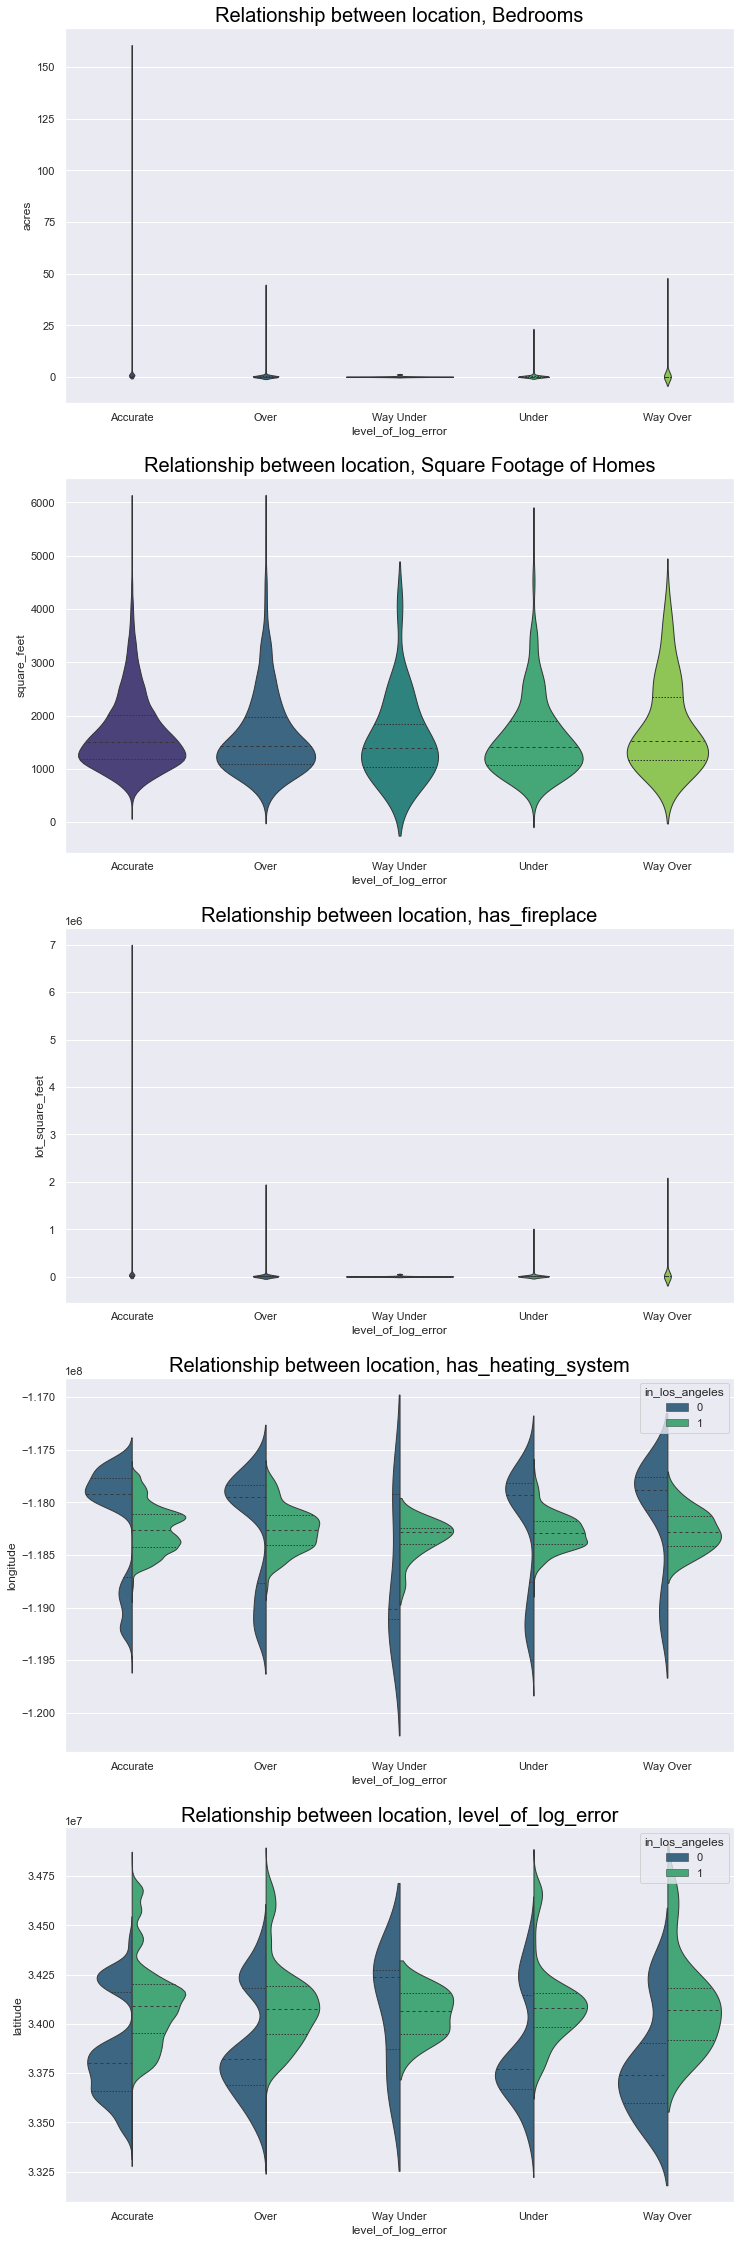

In [17]:
plt.subplots(5, 1, figsize=(12,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.violinplot(y='acres', x='level_of_log_error', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.violinplot(y='square_feet', x='level_of_log_error', data=train,
               inner="quart", linewidth=1, 
               palette='viridis')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='lot_square_feet', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='longitude', hue='in_los_angeles', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='latitude', hue='in_los_angeles', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

### Takeaways:
- 

____

<AxesSubplot:xlabel='logerror'>

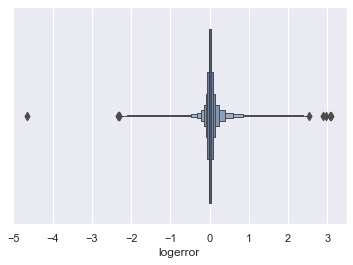

In [18]:
sns.boxenplot(x=train["logerror"])

In [19]:
df.level_of_log_error.value_counts()

Accurate     54235
Over          3413
Under         1841
Way Over       193
Way Under       49
Name: level_of_log_error, dtype: int64

### Takeaways:
- A reading of "Way Under"
    - log error between -1 and -5
- A reading of "Under"
    - log error between -0.15 and -1
- An accurate reading 
    - log error between -.15 and 0.15
- A reading of "Over" 
    - log error between 0.15 and 1
- A reading of "Way Over"
    - log error between 1 and 5
        
- There are far more accurate readings then unaccurate readings.
    - Accurate readings
        - 46,416 total
    - All other readings
        - 4,791 total
    
        
This leads me the believe that there may not be just one driver of logerror. Many features may be driving the log error we do have. I Would want to look further into this using a regression model maybe.


___

<AxesSubplot:xlabel='land_tax_value', ylabel='logerror'>

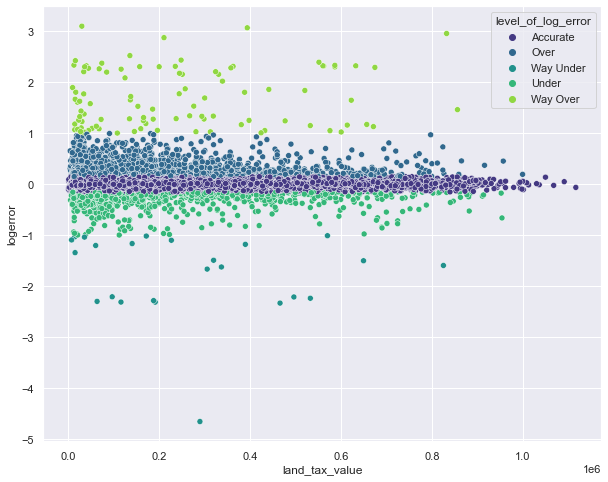

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = train.land_tax_value, y = train.logerror, hue = train.level_of_log_error, palette='viridis')

### Takeaways:
- 

____

<AxesSubplot:title={'center':'Percents of Each Log Error Level in Ventura'}, xlabel='level_of_log_error', ylabel='in_ventura'>

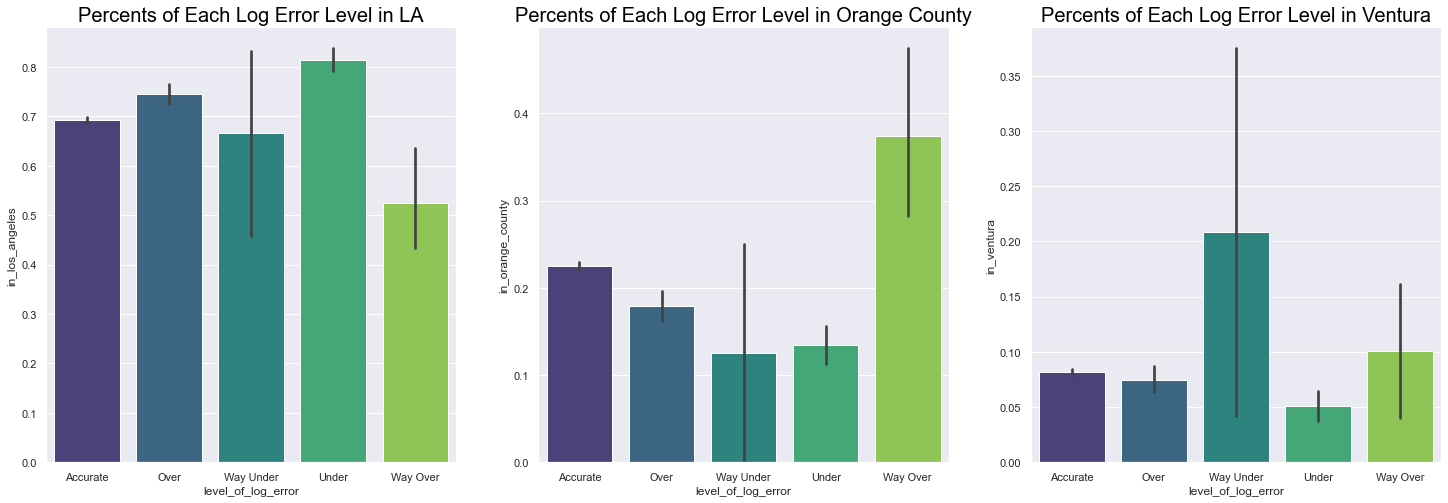

In [21]:
plt.subplots(1, 3, figsize=(25,8), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Percents of Each Log Error Level in LA", size=20, color='black')
sns.barplot(y='in_los_angeles', x='level_of_log_error', data=train,
               palette='viridis')

plt.subplot(1,3,2)
plt.title("Percents of Each Log Error Level in Orange County", size=20, color='black')
sns.barplot(y='in_orange_county', x='level_of_log_error', data=train,
               palette='viridis')
    
plt.subplot(1,3,3)
plt.title("Percents of Each Log Error Level in Ventura", size=20, color='black')
sns.barplot(y='in_ventura', x='level_of_log_error', data=train,
               palette='viridis')

### Takeaways:
- Percentage of log errors:
    - Accurate Percentages
        - ~69% of accurate log error is in Los Angeles
        - ~23% in Oragne County
        - ~8% in Ventura
    - Over Percentages
        - ~75% of Over log errors is in Los Angeles
        - ~18% in Oragne County
        - ~7% in Ventura
    - Wy Under Percentages
        - ~67% of way under log errors in Los Angeles
        - ~12% in Oragne County
        - ~21% in Ventura
    - Under Percentages
        - ~81% of under log errors in Los Angeles
        - ~14% in Oragne County
        - ~5% in Ventura
    - Way Over Percentages
        - ~52% of over log errors is in Los Angeles
        - ~38% in Oragne County
        - ~10% in Ventura

___

<AxesSubplot:title={'center':'Log Error Frequencies in Ventura'}, xlabel='level_of_log_error', ylabel='count'>

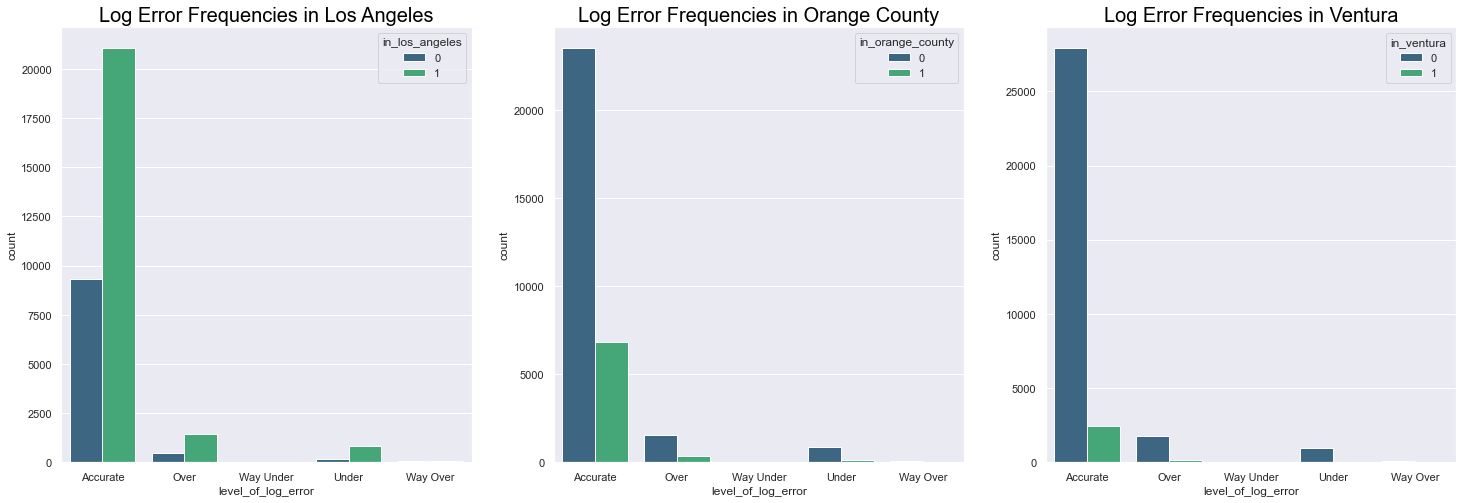

In [22]:
plt.subplots(1, 3, figsize=(25,8), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Log Error Frequencies in Los Angeles", size=20, color='black')
sns.countplot(x='level_of_log_error', hue='in_los_angeles', data=train,
               palette='viridis')

plt.subplot(1,3,2)
plt.title("Log Error Frequencies in Orange County", size=20, color='black')
sns.countplot(x='level_of_log_error', hue='in_orange_county', data=train,
               palette='viridis')
    
plt.subplot(1,3,3)
plt.title("Log Error Frequencies in Ventura", size=20, color='black')
sns.countplot(x='level_of_log_error', hue='in_ventura', data=train,
               palette='viridis')

In [23]:
binary_vars = ['bedrooms', 'bathrooms', 'land_type', 'has_heating_system',
               'fips', 'has_fireplace', 'full_bathrooms','has_pool', 'city','county',
               'zip_code','unitcnt','in_los_angeles', 'in_orange_county', 'in_ventura',
                'lot_sqft_bins','acre_bins','square_feet_bins' ]

quant_vars = ['square_feet', 'lot_square_feet', 'quality', 'latitude', 'bathrooms', 'bedrooms',
                'longitude','room_count', 'structure_tax_value','tax_value', 'land_tax_value', 
              'taxamount', 'house_age', 'tax_rate']

categorical_target = 'level_of_log_error'
continuous_target = 'logerror'

# Clustering

## Latitude Clustering

In [24]:
A = train[['latitude', 'longitude']]
scaler = StandardScaler().fit(A)
A_scaled = pd.DataFrame(scaler.transform(A), columns= A.columns).set_index([A.index.values])
A.head()

latitude    longitude
28964  33961204.0 -118093125.0
42720  33404202.0 -117593933.0
5104   34183576.0 -118344163.0
37768  34040190.0 -117734747.0
10735  34589057.0 -118180333.0

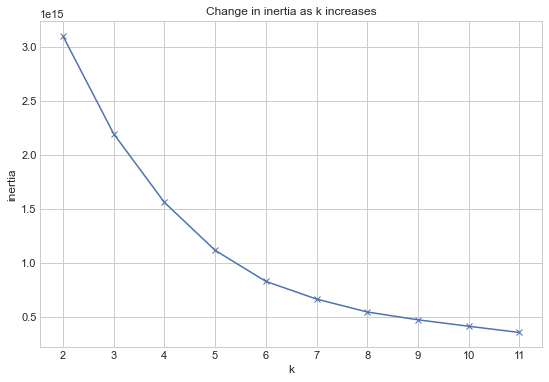

In [25]:
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(A).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

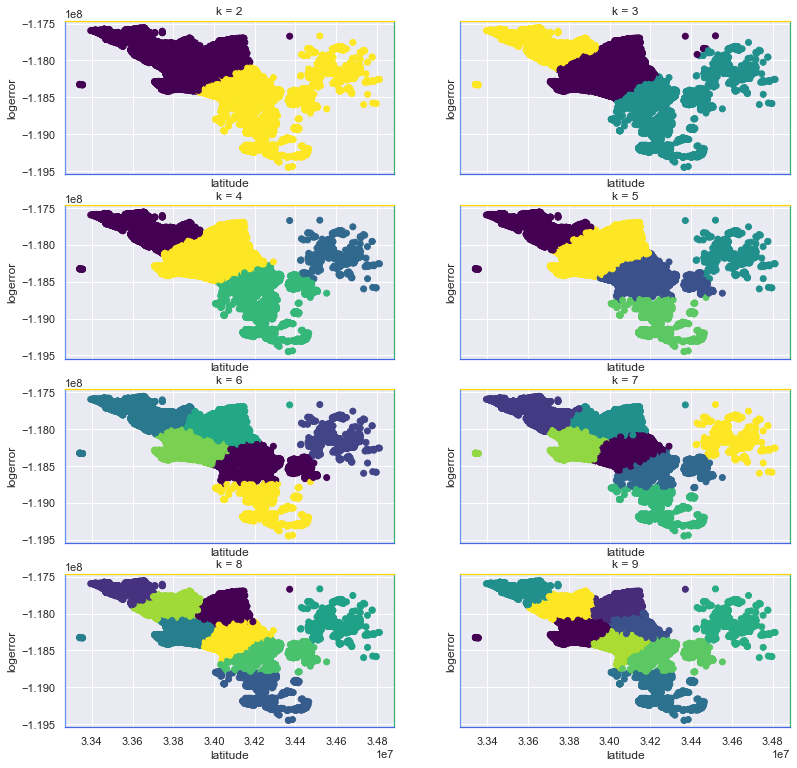

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(A_scaled).predict(A_scaled)
    ax.scatter(A.latitude, A.longitude, c=clusters, cmap='viridis_r')
    ax.spines["bottom"].set_color("royalblue")
    ax.spines["left"].set_color("cornflowerblue")
    ax.spines["top"].set_color("gold")
    ax.spines["right"].set_color("mediumseagreen")
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='logerror')

Lets try a k of 3

In [27]:
#define the thing
kmeans = KMeans(n_clusters=3)
# fit the thing
kmeans.fit(A_scaled)
# Use (predict using) the thing 
kmeans.predict(A_scaled)

# create the cluster features
train['lat_long_cluster'] = kmeans.predict(A_scaled)
A_scaled['lat_long_cluster'] = kmeans.predict(A_scaled)

# set centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = A.columns)
centroids = train.groupby('lat_long_cluster')['latitude', 'longitude'].mean()

# Rename the clusters
train['latitude_cluster'] = 'cluster' + train.lat_long_cluster.astype(str)

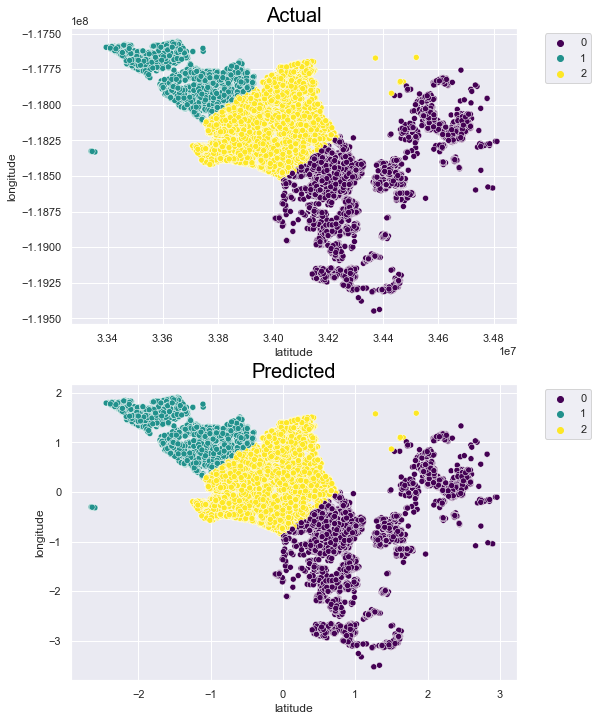

In [28]:
plt.subplots(5, 1, figsize=(8,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plt.title("Actual", size=20, color='black')
sns.scatterplot(data=train, x='latitude', y='longitude', hue='lat_long_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(2,1,2)
plt.title("Predicted", size=20, color='black')
sns.scatterplot(data=A_scaled, x='latitude', y='longitude', hue='lat_long_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<Figure size 1008x648 with 0 Axes>

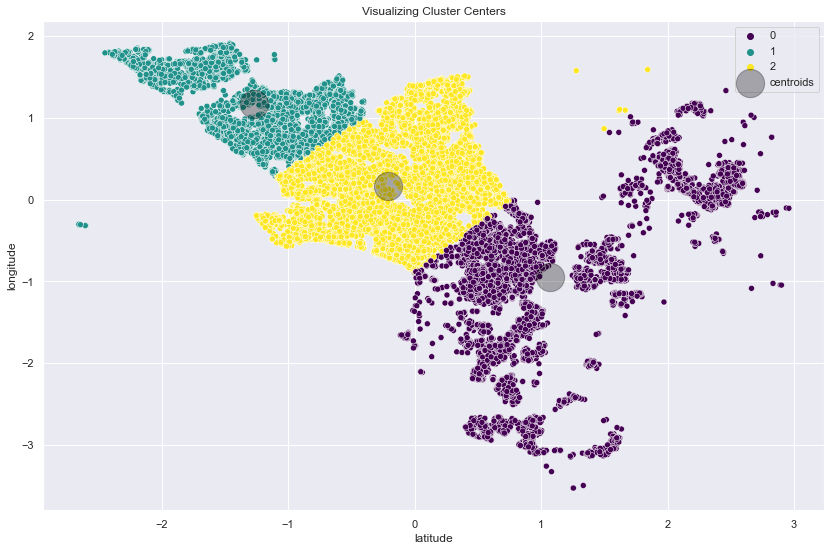

In [29]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='latitude', y='longitude', data=A_scaled, hue='lat_long_cluster', palette='viridis')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='latitude', y='longitude', ax = plt.gca(), color ='black', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<Figure size 1008x648 with 0 Axes>

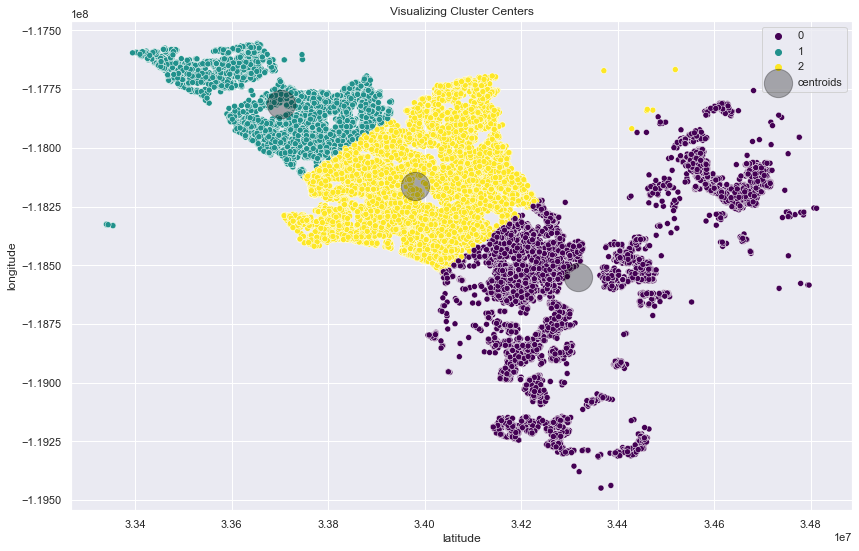

In [30]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='latitude', y='longitude', data=train, hue='lat_long_cluster', palette='viridis')

# plot cluster centers (centroids)
centroids.plot.scatter(x='latitude', y='longitude', ax = plt.gca(), color ='black', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

Lets go wiht k = 6

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33448 entries, 28964 to 8383
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             33448 non-null  int64  
 1   land_type            33448 non-null  float64
 2   has_heating_system   33448 non-null  int64  
 3   bathrooms            33448 non-null  float64
 4   bedrooms             33448 non-null  float64
 5   quality              33448 non-null  float64
 6   square_feet          33448 non-null  float64
 7   fips                 33448 non-null  float64
 8   has_fireplace        33448 non-null  float64
 9   full_bathrooms       33448 non-null  float64
 10  latitude             33448 non-null  float64
 11  longitude            33448 non-null  float64
 12  lot_square_feet      33448 non-null  float64
 13  has_pool             33448 non-null  float64
 14  city                 33448 non-null  float64
 15  county               33448 non-nu

### Anova test on latitude and longitude

$H_O$: There is no signficant difference between the log error means of each individual cluster.

$H_A$: There is a signficant difference between the log error means of at least one clusters.

In [32]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least two of the 3 clusters.'

alpha = 0.05

F, p = stats.f_oneway(train[train.lat_long_cluster == 0].logerror,
                      train[train.lat_long_cluster == 1].logerror,
                      train[train.lat_long_cluster == 2].logerror)

if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
    
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')

print('Anova Test Results on Latitude and Longitude Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

We reject the null hypothesis:
 There is no signficant difference between the log error means of each individual cluster. 

We continue forward with our alternative hypothesis:
 There is a signficant difference between the log error means of at least two of the 3 clusters. 

Anova Test Results on Latitude and Longitude Cluster
Our F-value:
 11.789682280709032
Our P-value:
 7.613951595518684e-06


## Latitude, Longitude, and Has Heating System clustering

In [33]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
28964  12397645      261.0                   1        2.0       3.0      6.0   
42720  13899643      261.0                   0        1.0       2.0      6.0   
5104   10936804      261.0                   1        1.0       2.0      4.0   
37768  12877473      261.0                   1        3.0       5.0      6.0   
10735  11190920      261.0                   1        2.0       4.0      8.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  in_ventura  \
28964       1139.0  6037.0            0.0             2.0  ...           0   
42720        882.0  6059.0            0.0             1.0  ...           0   
5104         943.0  6037.0            0.0             1.0  ...           0   
37768       1449.0  6037.0            0.0             3.0  ...           0   
10735       1546.0  6037.0            0.0             2.0  ...           0   

       house_age   tax_rate     acres  level_of_log_error  square_feet_bins  \
28964       70.0  77.088243  0.115886            Accurate           1k-1.5k   
42720       65.0  99.593289  0.094582            Accurate            500-1k   
5104        81.0  91.300853  0.163522            Accurate            500-1k   
37768       51.0  77.842486  0.141919                Over           1k-1.5k   
10735       29.0  51.992135  0.195294            Accurate           1.5l-2k   

       lot_sqft_bins  acre_bins  lat_long_cluster  latitude_cluster  
28964          0-10k       0-15                 2          cluster2  
42720          0-10k       0-15                 1          cluster1  
5104           0-10k       0-15                 0          cluster0  
37768          0-10k       0-15                 2          cluster2  
10735          0-10k       0-15                 0          cluster0  

[5 rows x 36 columns]

In [34]:
B = train[['structure_tax_value', 'land_tax_value']]
scaler = StandardScaler().fit(B)
B_scaled = pd.DataFrame(scaler.transform(B), columns= B.columns).set_index([B.index.values])
B.head()

structure_tax_value  land_tax_value
28964              92369.0        270066.0
42720              52148.0        592852.0
5104               97901.0        391614.0
37768             180903.0         85625.0
10735             113176.0         28292.0

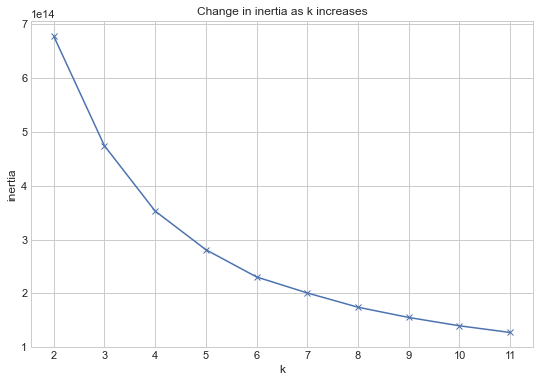

In [35]:
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(B).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

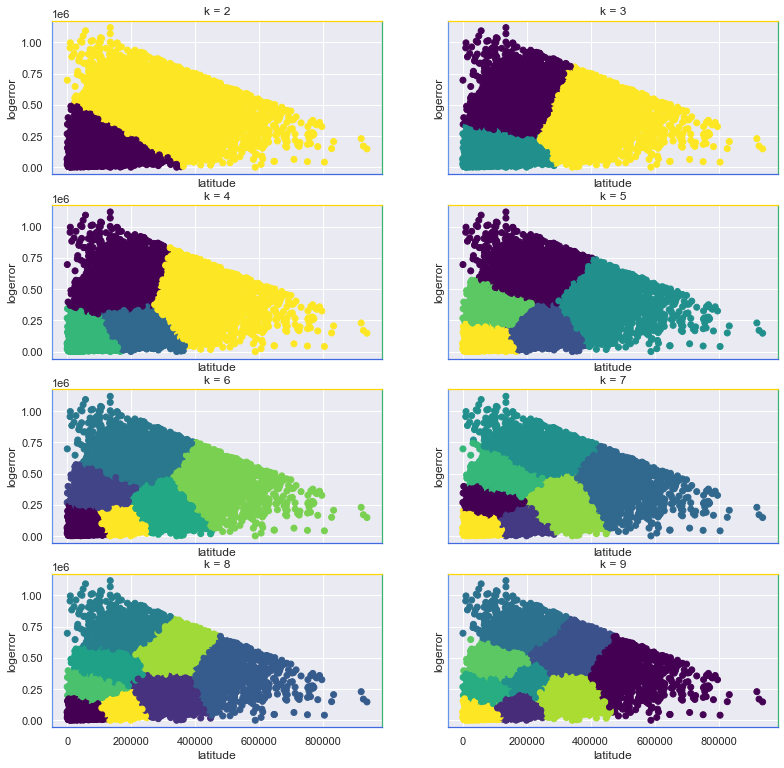

In [36]:
fig, axs = plt.subplots(4, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(B_scaled).predict(B_scaled)
    ax.scatter(B.structure_tax_value, B.land_tax_value, c=clusters, cmap='viridis_r')
    ax.spines["bottom"].set_color("royalblue")
    ax.spines["left"].set_color("cornflowerblue")
    ax.spines["top"].set_color("gold")
    ax.spines["right"].set_color("mediumseagreen")
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='logerror')
    

In [37]:
#define the thing
kmeans = KMeans(n_clusters=6, random_state=123)
# fit the thing
kmeans = kmeans.fit(B_scaled)
# Use (predict using) the thing 
kmeans.predict(B_scaled)


array([3, 1, 3, ..., 2, 4, 4], dtype=int32)

In [38]:
# create the cluster features
train['taxes_cluster'] = kmeans.labels_
B_scaled['taxes_cluster'] = kmeans.labels_


In [39]:
kmeans.cluster_centers_

array([[-0.84306838, -0.85444571],
       [ 0.54873633,  2.02132519],
       [ 1.20997205,  0.03294633],
       [-0.34564887,  0.58495305],
       [ 0.03013142, -0.55816721],
       [ 3.03110159,  0.92709124]])

In [40]:
train.groupby('taxes_cluster')['structure_tax_value', 'land_tax_value'].mean()

structure_tax_value  land_tax_value
taxes_cluster                                     
0                     62877.909220    66414.874086
1                    209957.414641   600150.214348
2                    280214.067250   231287.997266
3                    115468.950596   332959.301513
4                    155468.908673   121073.174124
5                    472829.768963   397498.295059

In [41]:
# set centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['structure_tax_value', 'land_tax_value'])
centroids = train.groupby('taxes_cluster')['structure_tax_value', 'land_tax_value'].mean()



# Rename the clusters
train['taxes_cluster'] = 'cluster' + train.taxes_cluster.astype(str)

In [42]:
centroids_scaled

structure_tax_value  land_tax_value
0            -0.843068       -0.854446
1             0.548736        2.021325
2             1.209972        0.032946
3            -0.345649        0.584953
4             0.030131       -0.558167
5             3.031102        0.927091

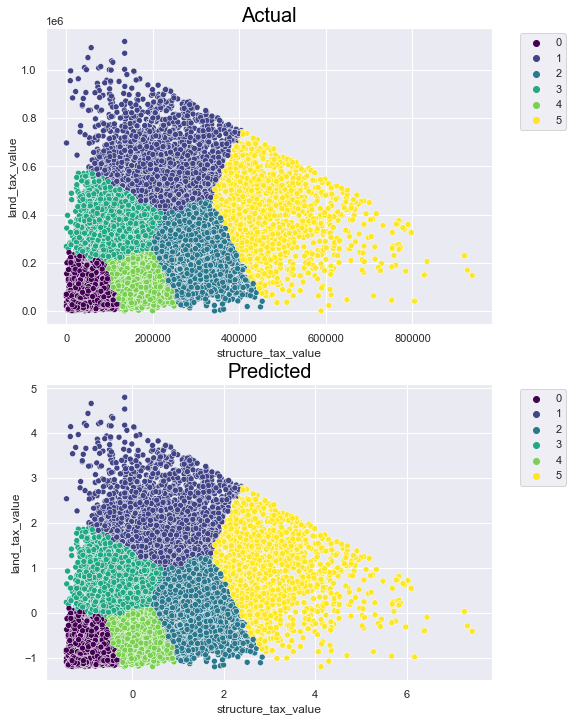

In [43]:
plt.subplots(2, 1, figsize=(8,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plt.title("Actual", size=20, color='black')
sns.scatterplot(data=train, x='structure_tax_value', y='land_tax_value', hue='taxes_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(2,1,2)
plt.title("Predicted", size=20, color='black')
sns.scatterplot(data=B_scaled, x='structure_tax_value', y='land_tax_value', hue='taxes_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<Figure size 1008x648 with 0 Axes>

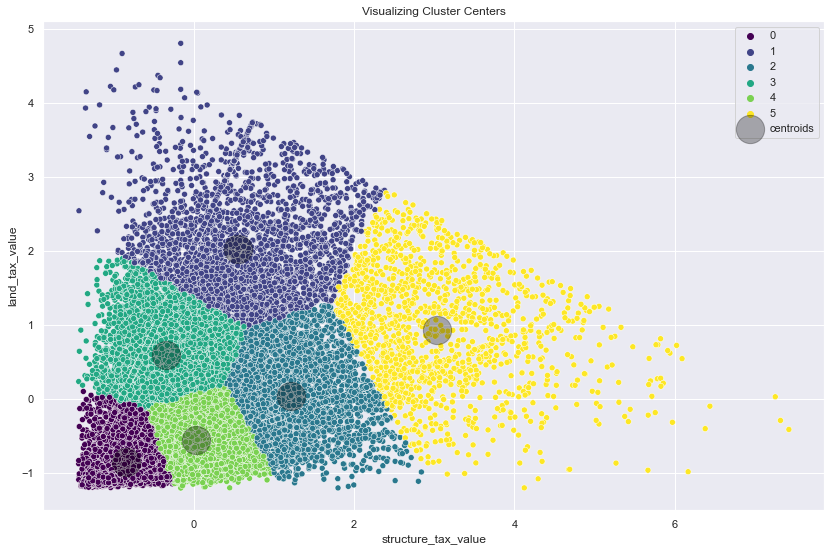

In [44]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='structure_tax_value', y='land_tax_value', data=B_scaled, hue='taxes_cluster', palette='viridis')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='structure_tax_value', y='land_tax_value', ax = plt.gca(), color ='black', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<Figure size 1008x648 with 0 Axes>

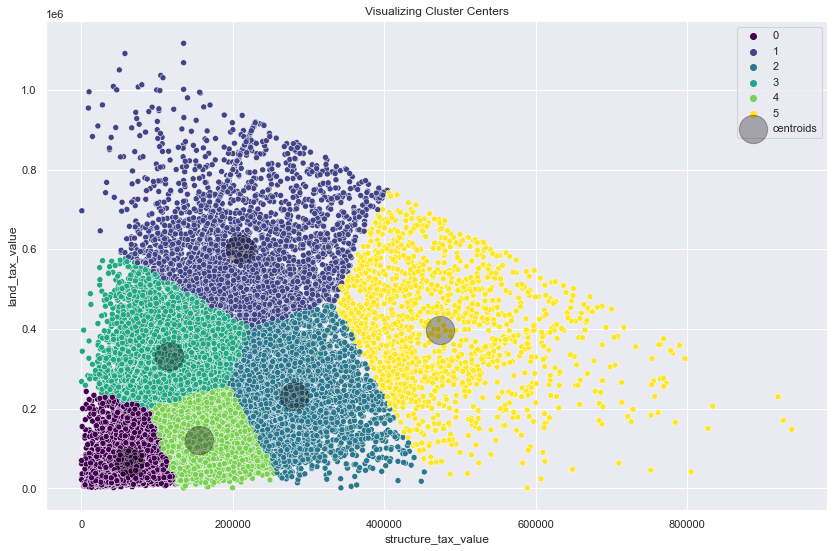

In [45]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='structure_tax_value', y='land_tax_value', data=train, hue='taxes_cluster', palette='viridis')

# plot cluster centers (centroids)
centroids.plot.scatter(x='structure_tax_value', y='land_tax_value', ax = plt.gca(), color ='black', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### Anova test on Structure and Land Tax Value

$H_O$: There is no signficant difference between the log error means of each individual cluster.

$H_A$: There is a signficant difference between the log error means of at least one clusters.

In [46]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one clusters.'

alpha = 0.05

F, p = stats.f_oneway(train[train.taxes_cluster == 0].logerror,
                      train[train.taxes_cluster == 1].logerror,
                      train[train.taxes_cluster == 2].logerror,
                      train[train.taxes_cluster == 3].logerror,
                      train[train.taxes_cluster == 4].logerror, 
                      train[train.taxes_cluster == 5].logerror)

if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
    
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')

print('Anova Test Results on Latitude and Longitude Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

We reject the null hypothesis:
 There is no signficant difference between the log error means of each individual cluster. 

We continue forward with our alternative hypothesis:
 There is a signficant difference between the log error means of at least one clusters. 

Anova Test Results on Latitude and Longitude Cluster
Our F-value:
 5.33766617195164
Our P-value:
 6.587050443007507e-05


<Figure size 1008x648 with 0 Axes>

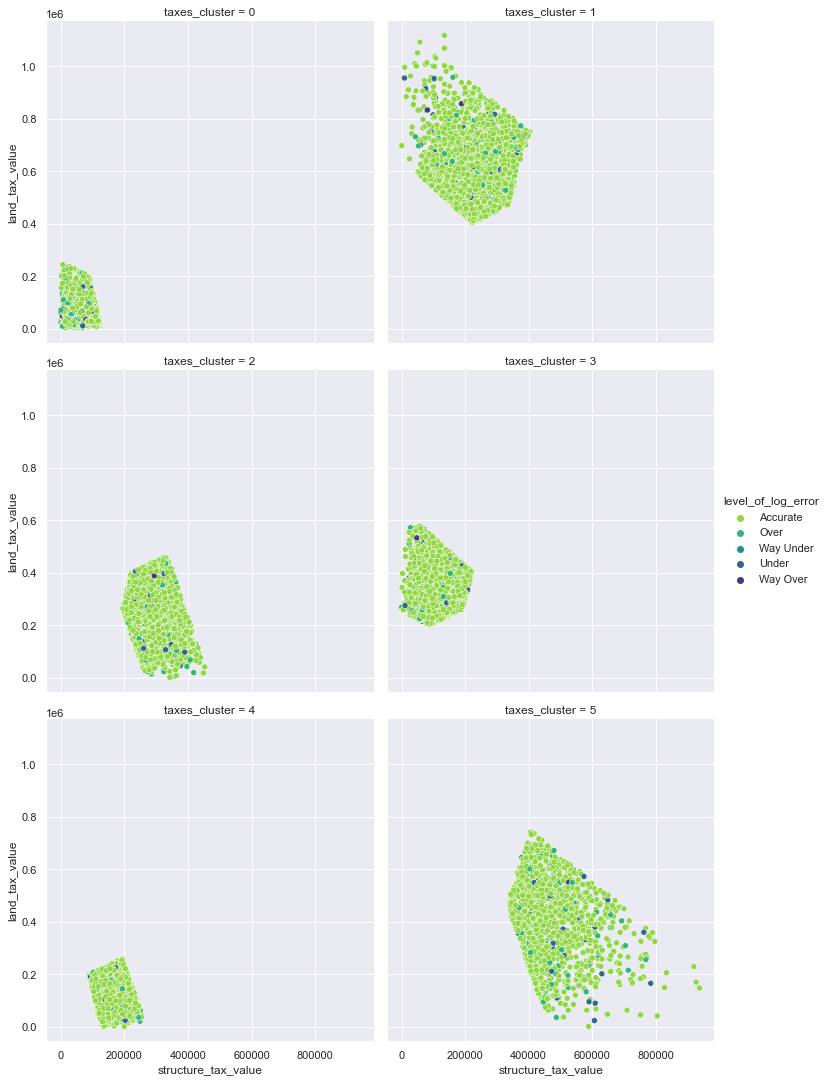

In [47]:
# lets visualize the clusters along with the centers on (scaled data).
plt.figure(figsize=(14, 9))
# scatter plot of data with hue for cluster
sns.relplot(x='structure_tax_value', y='land_tax_value', 
            data = train, col = train.taxes_cluster, 
            col_wrap = 2, hue = train.level_of_log_error, 
           palette='viridis_r')
# plot cluster centers (centroids)
# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)
plt.show();

# Rename the clusters
train['taxes_cluster'] = train.rename(columns={0:'Lowest on both', 
                           1:'Medium land, low structure', 2:'High Structure, Medium Land', 
                           3:'Medium ',
                           4:'Low on both', 
                           5:'High Land, but low structure '})

In [48]:
train.taxes_cluster.value_counts()

0    9848
4    7621
3    7469
2    3658
1    3415
5    1437
Name: taxes_cluster, dtype: int64

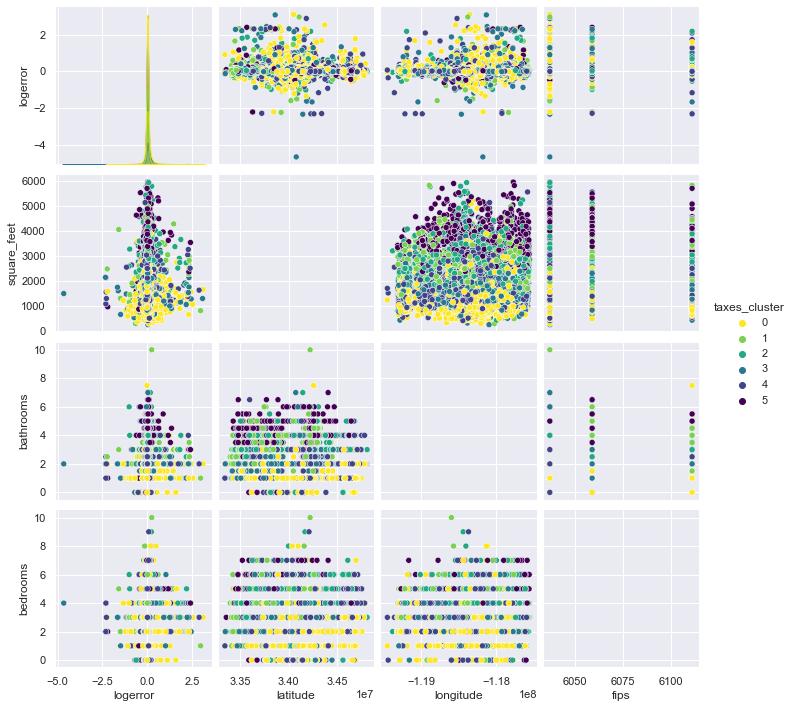

In [49]:
sns.pairplot(data = train, hue = 'taxes_cluster', 
             y_vars = ['logerror', 'square_feet', 'bathrooms', 'bedrooms'],
             x_vars = ['logerror', 'latitude', 'longitude', 'fips'], 
             palette='viridis_r')

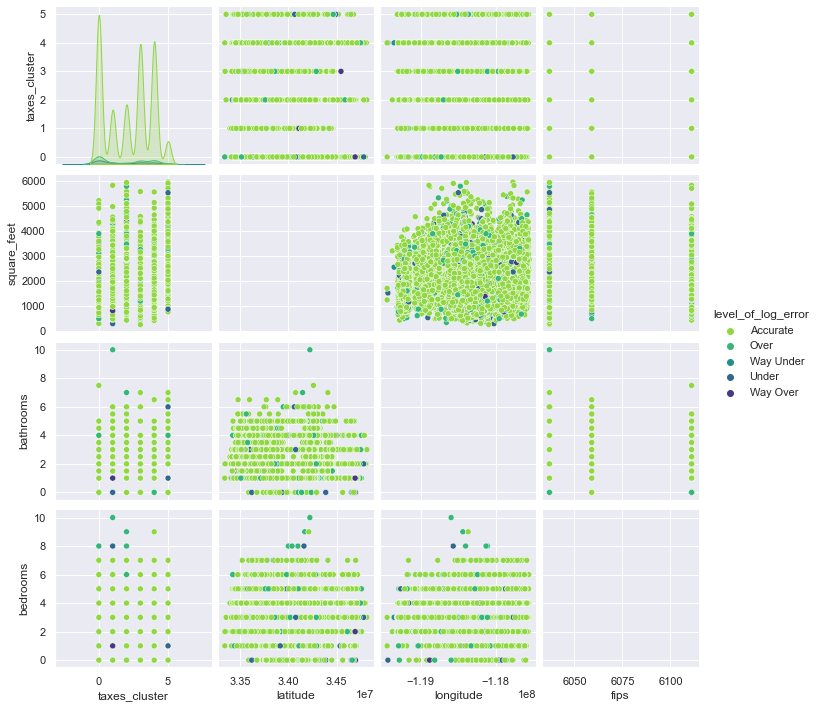

In [50]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             y_vars = ['taxes_cluster', 'square_feet', 'bathrooms', 'bedrooms'],
             x_vars = ['taxes_cluster', 'latitude', 'longitude', 'fips'], 
             palette='viridis_r')

# Statistical Tests

## Heating Sytems and Logerror
#### Chi Square Test

Null Hypothesis:
- "A home having a heating system is independent from logerror"

Alternative Hypothesis:
- "A home having a heating system is dependent from logerror"

In [ ]:
null_hypothesis = "A home having a heating system is independent from logerror"
alt_hypothesis = "A home having a heating system is dependent from logerror"
confidence_level = 0.95
alpha = 1 - confidence_level

observed = pd.crosstab(train.has_heating_system, train.logerror) 

chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Our Alpha = ", alpha)
print("Our Chi Sqare = ", chi2)
print("Our P Value = ", p)
print("Our Degree of Freedom = ", degf)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
    print("We move ahead with our alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move stop here at our null hypothesis: ", null_hypothesis)

___

## Heating Sytems and Level of Log Error
#### Chi Square Test

Null Hypothesis:
- "A home having a heating system is independent from the level of log error"

Alternative Hypothesis:
- "A home having a heating system is dependent from the level of log error"

In [ ]:
null_hypothesis = "A home having a heating system is independent from the level of logerror"
alt_hypothesis = "A home having a heating system is dependent from the level of logerror"
confidence_level = 0.95
alpha = 1 - confidence_level

observed = pd.crosstab(train.has_heating_system, train.level_of_log_error) 

chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Our Alpha = ", alpha)
print("Our Chi Sqare = ", chi2)
print("Our P Value = ", p)
print("Our Degree of Freedom = ", degf)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: ", null_hypothesis)
    print("We move ahead with our alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move stop here at our null hypothesis: ", null_hypothesis)

___

## Longitude and Logerreor
#### 2 Sample T-test

___

## Longitude and Level of Logerreor
#### R Square

___

## Latitude and Logerreor
#### 2 Sample T-test

___

## Latitude and Level of Logerreor
#### R Square Test



___

## Living in Los Angeles and Level of Logerreor
#### Chi Squared

Null Hypothesis:
- "A home being in Los Angeles and our logerror are independent from each other."

Alternative Hypothesis:
- "Level of logerror and a homes residence in Los Angeles are dependent on each other."

In [ ]:
null_hypothesis = "A home being in Los Angeles and our logerror level are independent from each other."
alt_hypothesis = "Level of logerror and a homes residence in Los Angeles are dependent on each other."
confidence_level = 0.95
alpha = 1 - confidence_level

observed = pd.crosstab(train.in_los_angeles, train.logerror) 

chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Our Alpha = ", alpha)
print("Our Chi Sqare = ", chi2)
print("Our P Value = ", p)
print("Our Degree of Freedom = ", degf)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: ", null_hypothesis)
    print("We move ahead with our alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move stop here at our null hypothesis: ", null_hypothesis)

___

## Living in Los Angeles and Level of Logerreor
#### Chi Squared

Null Hypothesis:
- "If a home is located in Los Angeles or not is independent from the level of logerror."

Alternative Hypothesis:
- "Level of logerror and whetehr a home in in Los Angeles or not are independent form each other."

In [ ]:
null_hypothesis = "If a home is located in Los Angeles or not is independent from the levvel of logerror."
alt_hypothesis = "Logerror and whetehr a home in in Los Angeles or not are independent form each other."
confidence_level = 0.95
alpha = 1 - confidence_level

observed = pd.crosstab(train.in_los_angeles, train.logerror) 

chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Our Alpha = ", alpha)
print("Our Chi Sqare = ", chi2)
print("Our P Value = ", p)
print("Our Degree of Freedom = ", degf)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: ", null_hypothesis)
    print("We move ahead with our alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move stop here at our null hypothesis: ", null_hypothesis)

___

## Living in Orange County and Logerreor
#### Chi Squared

Null Hypothesis:
- "A home being in Orange County and our logerror are independent from each other."

Alternative Hypothesis:
- "Logerror and a homes residence in Orange County are dependent on each other."

In [ ]:
null_hypothesis = "A home being in Orange County and our logerror are independent from each other."
alt_hypothesis = "Logerror and a homes residence in Orange County are dependent on each other."
confidence_level = 0.95
alpha = 1 - confidence_level

observed = pd.crosstab(train.in_los_angeles, train.level_of_log_error) 

chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Our Alpha = ", alpha)
print("Our Chi Sqare = ", chi2)
print("Our P Value = ", p)
print("Our Degree of Freedom = ", degf)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: ", null_hypothesis)
    print("We move ahead with our alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move stop here at our null hypothesis: ", null_hypothesis)

___

## Living in Orange County and Level of Logerreor
#### Chi Squared

Null Hypothesis:
- "If a home is located in Orange County or not is independent from the levvel of logerror."

Alternative Hypothesis:
- "The level of log error and whetehr a home in in Orange County or not are independent form each other."

___

## Living in Ventura and Logerreor
#### Chi Squared

Null Hypothesis:
- "A home being in Ventura and our logerror are independent from each other."

Alternative Hypothesis:
- "Logerror and a homes residence in Ventura are dependent on each other."

___

## Living in Ventura and Level of Logerreor
#### Chi Squared

Null Hypothesis:
- "If a home is located in Ventura or not is independent from the levvel of logerror."

Alternative Hypothesis:
- "The level of log error and whetehr a home in in Ventura or not are independent form each other."

___